In [107]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from dotenv import find_dotenv, load_dotenv
import numpy as np

In [18]:
# Check for GPU, if you are not conected to a gpu, restart the runtime in the runtime sheet, to select a gpu, Runtime -> Change runtime type -> Hardware accelerator -> GPU.
!nvidia-smi -L

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
#LOAD THE DATA
load_dotenv()
train_df = pd.read_csv(os.getenv("TRAIN_DATA"))
test_df = pd.read_csv(os.getenv("TEST_DATA"))

## Visualizing a text dataset

In [21]:

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [22]:
# if the data is not already shuffle, lets shuffle it
train_df_shuffled = train_df.sample(frac=1, random_state=42) # random_state=42 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [23]:
#check the distribution of the target values where 1 menaning a real disaster tweet and 0 not a real disaster tweet 
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [24]:
# count the total samples for test and train
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [25]:
# Let's visualize some random training examples


def plot_random_data(df,text, target):

  random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
  for row in df[[text, target]][random_index:random_index+5].itertuples():#loop across the df random values
    _, text, target = row #return the index, the text and the target
    print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
    print(f"Text:\n{text}\n")
    print("---\n")

In [26]:
plot_random_data(train_df_shuffled,'text','target')

Target: 0 (not real disaster)
Text:
Maailiss: Diaporama : sixpenceee: Karymsky Lake is a crater lake located in the Karymsky volcanoåÊinåÊRussia. With aÛ_ http://t.co/4o460Fm8HN

---

Target: 0 (not real disaster)
Text:
My biggest fear is disappointing the people who believe in me

---

Target: 0 (not real disaster)
Text:
Just had my first counter on a league game against another Orianna I happened to demolish her xD. I totally appreciate people that play her

---

Target: 0 (not real disaster)
Text:
they say bad things happen for a reason
but no wise words gonna stop te bleeding

---

Target: 0 (not real disaster)
Text:
@CortezEra I dead ass screamed when we signed him I couldn't fucking believe it

---



In [27]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [28]:
# Find average number of words in training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [29]:
# Setup text vectorization
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,# how many words in the vocabulary (all of the different words in your text)
                                    output_mode="int",# how to map tokens to numbers
                                    output_sequence_length=max_length)# how long should the output sequence of tokens be?

In [30]:
# Fit the text vectorizer to the training set
text_vectorizer.adapt(train_sentences)

In [31]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

## Exploratory Data Analisys

c:\Users\w10\Desktop\NLP\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.patches.Wedge at 0x291bd34e2b0>,
 [Text(-1.0977433150136204, 0.34272381642206873, 'Not Disaster'),
  Text(1.0500153447956364, -0.327822780925458, 'Disaster')],
 [Text(-0.6204636128337854, 0.19371346145595184, '57.03%'),
  Text(0.5727356426158017, -0.17881242595934074, '42.97%')])

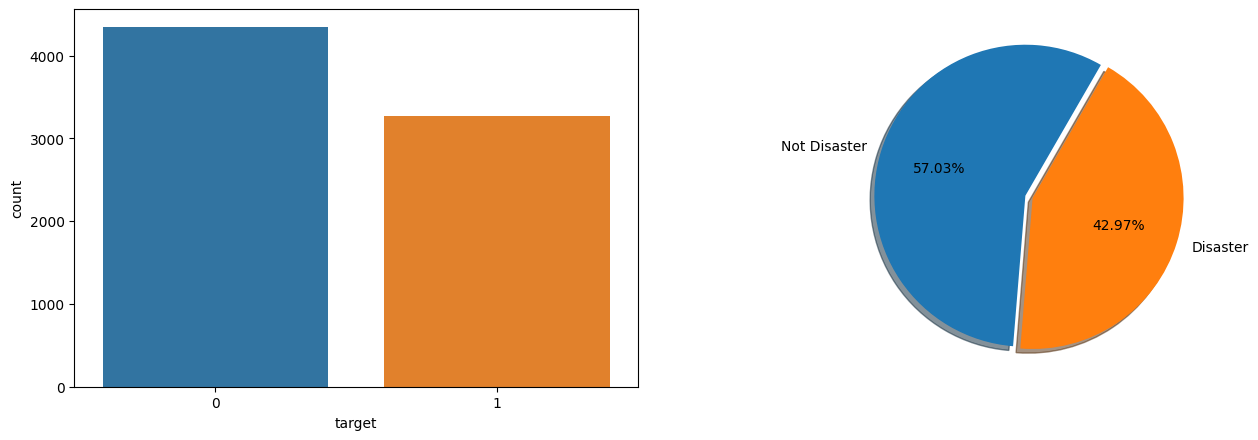

In [87]:
#let see the distribution of the target
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(16,5),dpi=100)
sns.countplot(train_df.target, ax=axes[0])
axes[1].pie(train_df.target.value_counts(),
    labels=['Not Disaster','Disaster'],
    shadow=True,
    autopct='%1.2f%%',explode=(0.05,0),startangle=60)

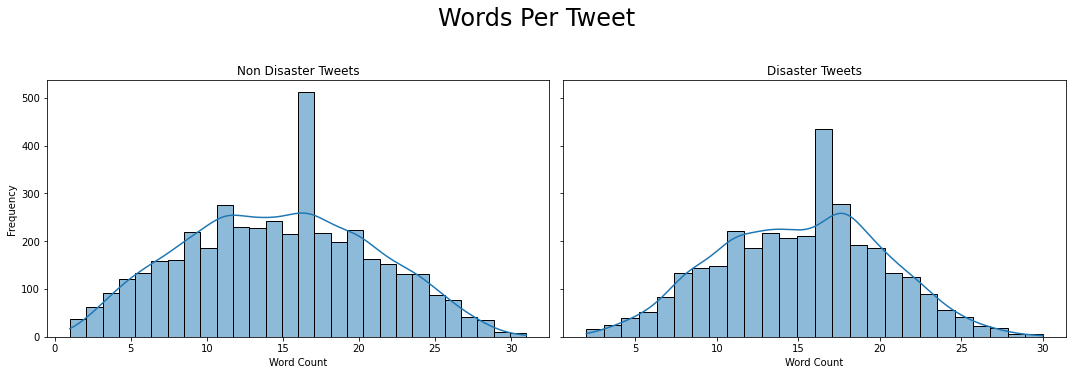

In [97]:
#distribution of number of words across the disas and non disaster tweets
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),sharey=True)
sns.histplot(train_df[train_df['target']==0]['text'].str.split().map(lambda x: len(x)),ax=axes[0],kde=True)
sns.histplot(train_df[train_df['target']==1]['text'].str.split().map(lambda x: len(x)),ax=axes[1],kde=True)

axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Non Disaster Tweets')
axes[1].set_xlabel('Word Count')
axes[1].set_title('Disaster Tweets')
    
fig.suptitle('Words Per Tweet', fontsize=24, va='baseline')
fig.tight_layout()

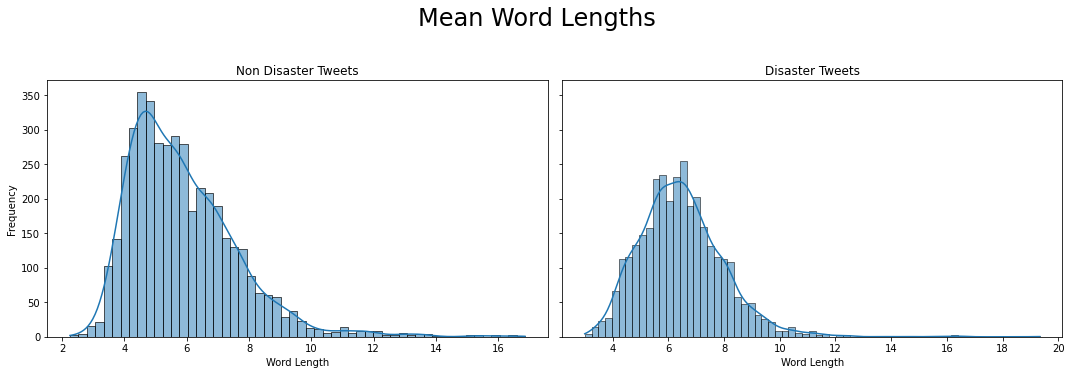

In [112]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(15,5),sharey=True)
sns.histplot(train_df[train_df['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)),ax=axes[0],kde=True)
sns.histplot(train_df[train_df['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)),ax=axes[1],kde=True)
axes[0].set_xlabel('Word Length')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Non Disaster Tweets')
axes[1].set_xlabel('Word Length')
axes[1].set_title('Disaster Tweets')

fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
fig.tight_layout()

In [117]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

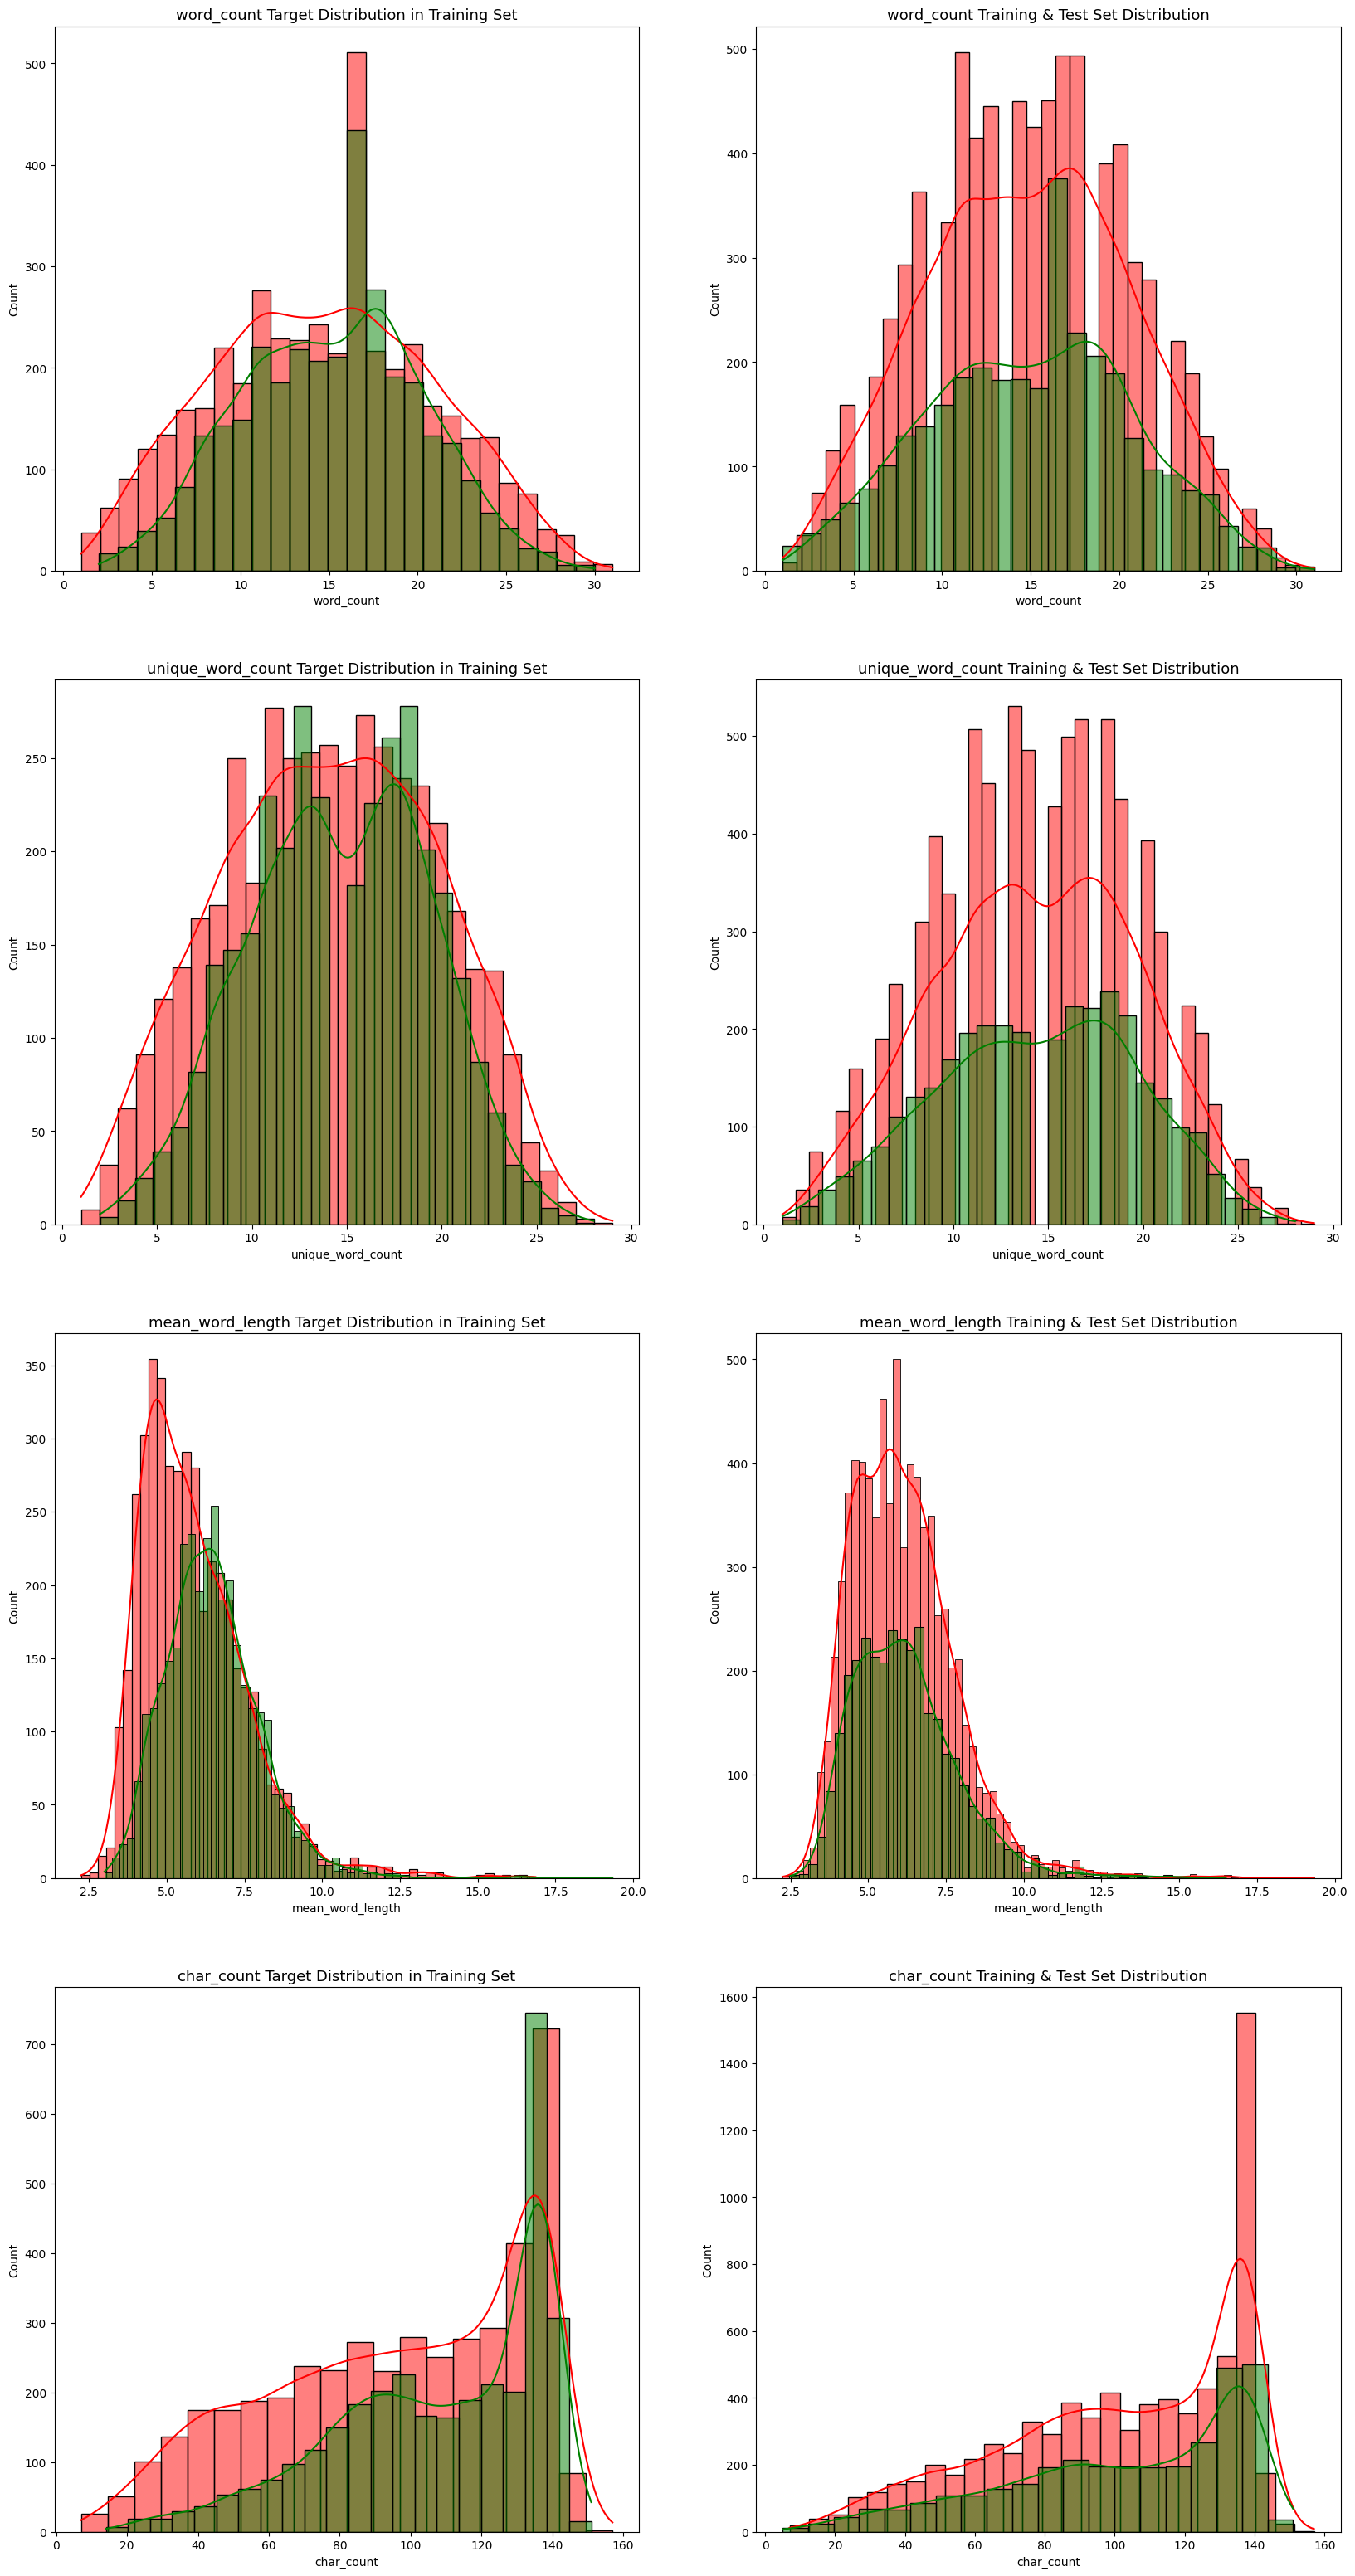

In [135]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()
#word count
train_df_copy['word_count'] = train_df['text'].apply(lambda x : len(str(x).split()))
test_df_copy['word_count'] = test_df['text'].apply(lambda x : len(str(x).split()))

#unique word count 
train_df_copy['unique_word_count'] = train_df['text'].apply(lambda x: len(set(str(x).split())))
test_df_copy['unique_word_count'] = test_df['text'].apply(lambda x: len(set(str(x).split())))

#char count
train_df_copy['char_count'] = train_df['text'].apply(lambda x : len(str(x)))
test_df_copy['char_count']  = test_df['text'].apply(lambda x: len(str(x)))

#mean word length 
train_df_copy['mean_word_length'] = train_df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_df_copy['mean_word_length'] = test_df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

METAFEATURES = ['word_count', 'unique_word_count','mean_word_length','char_count']
fig, axes = plt.subplots(nrows=len(METAFEATURES),ncols=2, figsize=(20,40),dpi=100)
DISASTER_TWEETS= train_df['target'] == 1

for i, feature in enumerate(METAFEATURES):
    sns.histplot(train_df_copy.loc[~DISASTER_TWEETS][feature], label = 'Not Disaster', ax = axes[i][0],color='red',kde=True)
    sns.histplot(train_df_copy.loc[DISASTER_TWEETS][feature], label = 'Disaster', ax = axes[i][0],color='green',kde=True)

    sns.histplot(train_df_copy[feature],label='Training',ax = axes[i][1],color='red',kde=True)
    sns.histplot(test_df_copy[feature],label='Test',ax = axes[i][1],color='green',kde=True)

    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

In [136]:
def ngrams(n, title):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette='plasma', ax=j)
        
        axes[0].set_title('Non Disaster Tweets')
        axes[1].set_title('Disaster Tweets')
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

NameError: name 'lis' is not defined

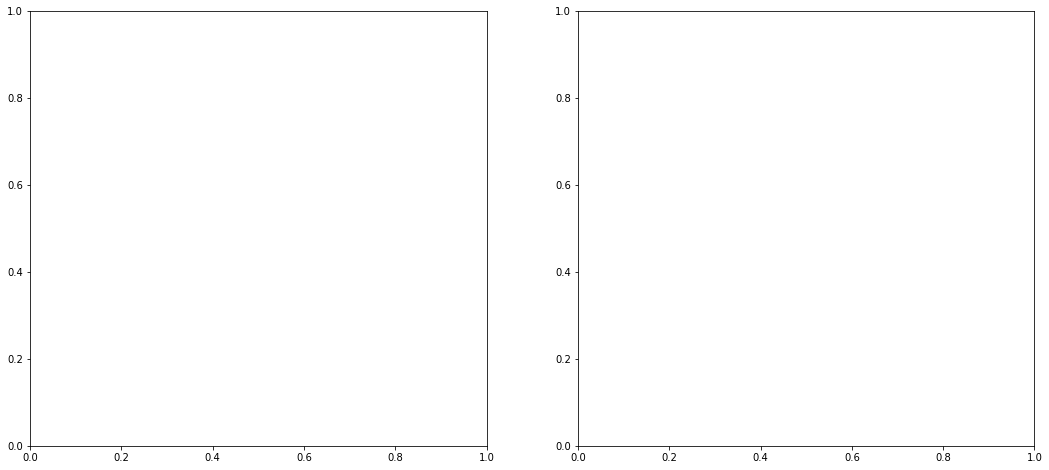

In [137]:
ngrams(2,'asdf')

## Creating an Embedding using an Embedding Layer

In [35]:
tf.random.set_seed(42)


embedding = keras.layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 



In [36]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Barbados #Bridgetown JAMAICA ÛÒ Two cars set ablaze: SANTA CRUZ ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03977952, -0.03782602, -0.03646283, ...,  0.00236253,
          0.03332629,  0.02803668],
        [ 0.03977952, -0.03782602, -0.03646283, ...,  0.00236253,
          0.03332629,  0.02803668],
        [ 0.02177162,  0.0190427 ,  0.03241551, ...,  0.04013481,
          0.01917167, -0.04208689],
        ...,
        [ 0.00257028, -0.04243337, -0.02343434, ..., -0.00133356,
          0.04663134,  0.00035417],
        [ 0.02504804,  0.02770906,  0.01542609, ..., -0.04612003,
         -0.02924401, -0.00331711],
        [ 0.0388079 , -0.0169502 , -0.02158027, ...,  0.03376238,
         -0.04956734,  0.02199184]]], dtype=float32)>

## Model 0: Getting a baseline

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [39]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)


In [40]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [41]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 1: LSTM

In [43]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_1_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_1_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [44]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [48]:
# Fit model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              )

Epoch 1/10
215/215 [==============================] - 4s 18ms/step - loss: 0.0811 - accuracy: 0.9657 - val_loss: 0.9880 - val_accuracy: 0.7598
Epoch 2/10
215/215 [==============================] - 4s 17ms/step - loss: 0.0753 - accuracy: 0.9693 - val_loss: 1.1756 - val_accuracy: 0.7480
Epoch 3/10
215/215 [==============================] - 4s 17ms/step - loss: 0.0589 - accuracy: 0.9736 - val_loss: 1.2486 - val_accuracy: 0.7572
Epoch 4/10
215/215 [==============================] - 4s 17ms/step - loss: 0.0592 - accuracy: 0.9747 - val_loss: 1.2234 - val_accuracy: 0.7441
Epoch 5/10
215/215 [==============================] - 4s 17ms/step - loss: 0.0482 - accuracy: 0.9768 - val_loss: 1.1797 - val_accuracy: 0.7559
Epoch 6/10
215/215 [==============================] - 4s 18ms/step - loss: 0.0477 - accuracy: 0.9788 - val_loss: 1.3749 - val_accuracy: 0.7520
Epoch 7/10
215/215 [==============================] - 4s 20ms/step - loss: 0.0398 - accuracy: 0.9799 - val_loss: 1.2479 - val_accuracy: 0.7572

In [53]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))

In [54]:
# Calculate LSTM model results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 75.19685039370079,
 'precision': 0.7575330533748617,
 'recall': 0.7519685039370079,
 'f1': 0.747484854432977}

## Model_2: GRU

In [55]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_GRU")

In [56]:
# Compile GRU model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [58]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels))

Epoch 1/10
215/215 [==============================] - 5s 23ms/step - loss: 0.0964 - accuracy: 0.9680 - val_loss: 0.7220 - val_accuracy: 0.7677
Epoch 2/10
215/215 [==============================] - 4s 17ms/step - loss: 0.0811 - accuracy: 0.9717 - val_loss: 0.9006 - val_accuracy: 0.7664
Epoch 3/10
215/215 [==============================] - 4s 16ms/step - loss: 0.0642 - accuracy: 0.9766 - val_loss: 1.0732 - val_accuracy: 0.7638
Epoch 4/10
215/215 [==============================] - 4s 21ms/step - loss: 0.0578 - accuracy: 0.9772 - val_loss: 0.9769 - val_accuracy: 0.7690
Epoch 5/10
215/215 [==============================] - 5s 21ms/step - loss: 0.0523 - accuracy: 0.9778 - val_loss: 1.1549 - val_accuracy: 0.7651
Epoch 6/10
215/215 [==============================] - 4s 21ms/step - loss: 0.0490 - accuracy: 0.9783 - val_loss: 1.2187 - val_accuracy: 0.7625
Epoch 7/10
215/215 [==============================] - 4s 18ms/step - loss: 0.0491 - accuracy: 0.9801 - val_loss: 1.0854 - val_accuracy: 0.7572

In [59]:
# Make predictions on the validation data
model_2_pred_probs = model_2.predict(val_sentences)
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [61]:
# Calcuate model_3 results
model_2_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 75.98425196850394,
 'precision': 0.7602880613964507,
 'recall': 0.7598425196850394,
 'f1': 0.7582369337868397}

## Model_3: CNN

In [62]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_Conv1D")

# Compile Conv1D model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [64]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              )

Epoch 1/5
215/215 [==============================] - 5s 17ms/step - loss: 0.5652 - accuracy: 0.7141 - val_loss: 0.4733 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3380 - accuracy: 0.8615 - val_loss: 0.4758 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2070 - accuracy: 0.9234 - val_loss: 0.5457 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1314 - accuracy: 0.9578 - val_loss: 0.6163 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0933 - accuracy: 0.9691 - val_loss: 0.6779 - val_accuracy: 0.7782


In [66]:
# Make predictions with model_3
model_3_pred_probs = model_3.predict(val_sentences)
# Convert model_5 prediction probabilities to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [67]:
# Calculate model_5 evaluation metrics 
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.82152230971128,
 'precision': 0.7807522349051432,
 'recall': 0.7782152230971129,
 'f1': 0.7758810170952618}

## Model_4: Transfer Learning

In [69]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878049 -0.01271502  0.03971542  0.08827761
  0.02680984  0.05589836 -0.0106873  -0.00597294  0.00639323 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180627  0.01512473 -0.05162927
  0.00991364 -0.06865346 -0.04209306  0.02678978  0.03011007  0.00321069
 -0.00337969 -0.04787355  0.02266721 -0.00985927 -0.04063614 -0.01292093
 -0.04666384  0.05630299 -0.03949255  0.00517685  0.02495828 -0.0701444
  0.02871508  0.04947681 -0.00633978 -0.08960194  0.0280712  -0.00808365
 -0.01360601  0.05998649 -0.10361788 -0.05195374  0.00232957 -0.0233253
 -0.03758107  0.03327728], shape=(50,), dtype=float32)


<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157025,  0.02485911,  0.02878049, ..., -0.00186125,
         0.02315821, -0.01485022],
       [ 0.0359669 , -0.08579468, -0.01152743, ..., -0.03414336,
         0.02816025, -0.00878943]], dtype=float32)>